In [1]:
import pandas as pd
from data_analysis_functions import *
import seaborn as sns
import numpy as np
import statistics as st
import os
import matplotlib.pyplot as plt
import warnings
import scipy
from scipy.linalg import cho_factor, cho_solve
from scipy.stats import multivariate_normal, wasserstein_distance
warnings.filterwarnings("ignore")

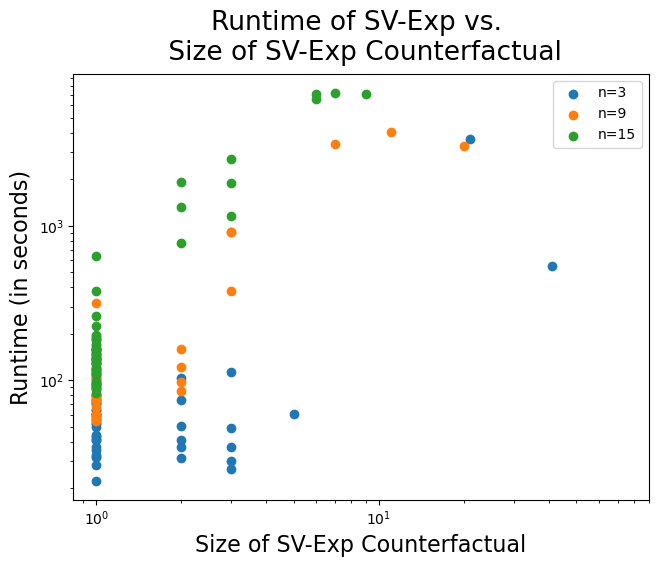

In [2]:
# Specify the folder where your CSV files are located
folder_path = "/Users/michellesi/Desktop/duke/research/shapley_stuff/slurm_runs"

# Get a list of all CSV files in the folder
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith("EX.csv")])
# csv_files = ['KDE_3_CANCER_EX.csv', 'KDE_6_CANCER_EX.csv', 'KDE_9_CANCER_EX.csv', 'KDE_12_CANCER_EX.csv', 'KDE_15_CANCER_EX.csv', 'LR_3_CANCER_EX.csv', 'LR_6_CANCER_EX.csv', 'LR_9_CANCER_EX.csv','LR_12_CANCER_EX.csv', 'LR_15_CANCER_EX.csv',]
csv_files = ['KDE_3_CANCER_EX.csv', 'KDE_9_CANCER_EX.csv', 'KDE_15_CANCER_EX.csv']
# csv_files = ['LR_3_CANCER_EX.csv', 'LR_9_CANCER_EX.csv', 'LR_15_CANCER_EX.csv']
# csv_files = ['LR_3_CANCER_EX.csv', 'LR_6_CANCER_EX.csv', 'LR_9_CANCER_EX.csv', 'LR_12_CANCER_EX.csv', 'LR_15_CANCER_EX.csv']
dataframes = []

for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)
    df.columns = ["ds_size","A_size","B_size","total_MC_samples","total_greedy_samples","MC_answer","greedy_answer","MC_time","greedy_time", "MC_accuracy", "greedy_accuracy", "MC_diff", "greedy_diff","num_owners", "data_dist", "size_dist", "util", "ds_name"]
    df.loc[df["MC_time"] == 0, "MC_time"] = 0.0001
    df["A_B_sizediff"] = df["A_size"] - df["B_size"]
    dataframes.append(df)

prepareData(dataframes, "greedy_answer")

In [3]:
summary_stats = process_csv_files(dataframes, ["MC_time", "greedy_time", "MC_accuracy", "greedy_accuracy","MC_answer", "greedy_answer"])
summary_stats_kde = summary_stats.head(5)
summary_stats_lr = summary_stats.tail(5).reset_index(drop=True)
summary_stats

,MC_time_mean,MC_time_std,greedy_time_mean,greedy_time_std,MC_accuracy_mean,MC_accuracy_std,greedy_accuracy_mean,greedy_accuracy_std,MC_answer_mean,MC_answer_std,greedy_answer_mean,greedy_answer_std,MC_accuracy,greedy_accuracy,num_owners,util,data_dist,size_dist,ds_name
0,924.250137,904.081884,143.395973,515.178197,0.947368,0.226294,0.979592,0.142857,1.052632,0.226294,2.632653,6.310355,94.736842,97.959184,3,kde,uniform,uniform,cancer
1,1657.392394,1302.053491,368.646315,854.399480,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.937500,3.165010,100.000000,100.000000,9,kde,uniform,uniform,cancer
2,2562.552238,1681.892884,499.914424,1093.389813,0.925000,0.266747,0.977778,0.149071,1.000000,0.000000,1.311111,0.900056,92.500000,97.777778,15,kde,uniform,uniform,cancer


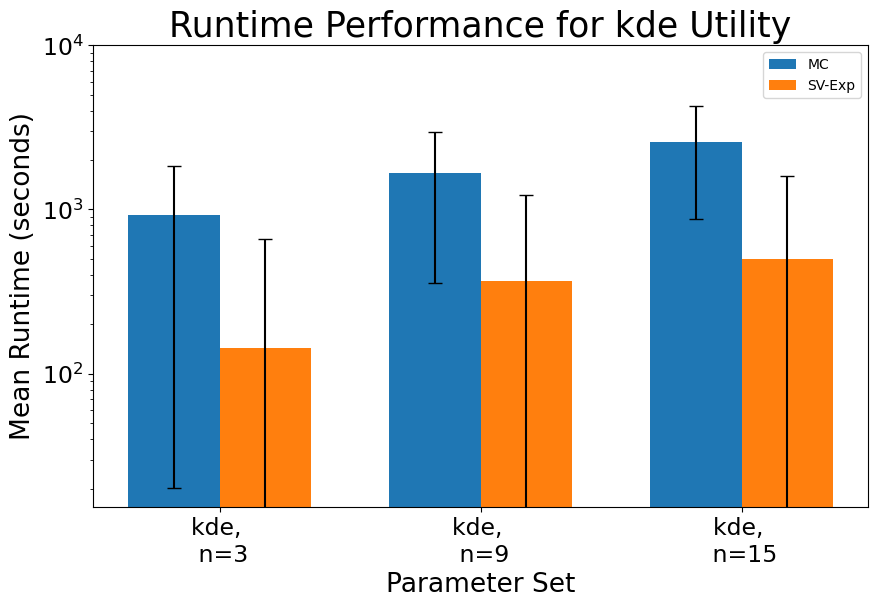

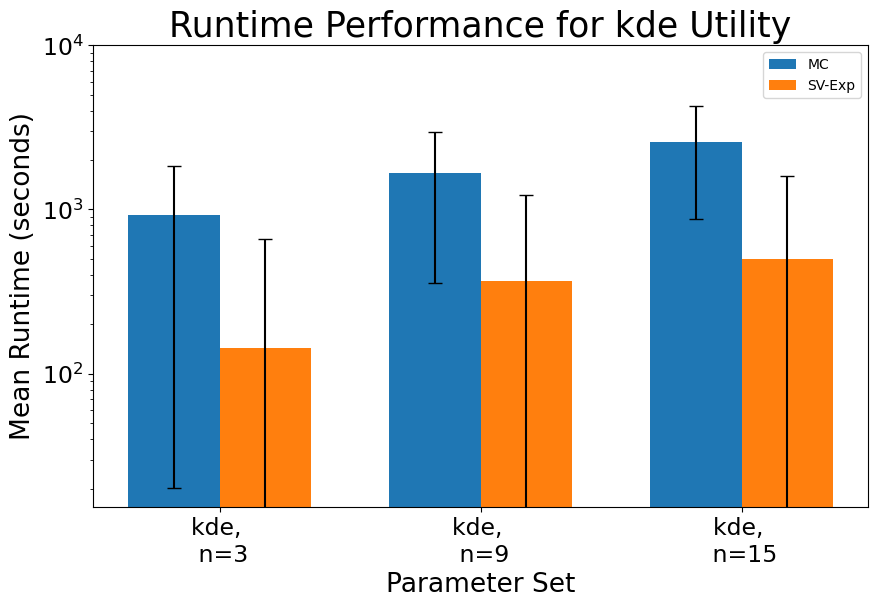

In [4]:
plot_runtimes(summary_stats_kde, 'MC_time','greedy_time')
plot_runtimes(summary_stats_lr, 'MC_time','greedy_time')

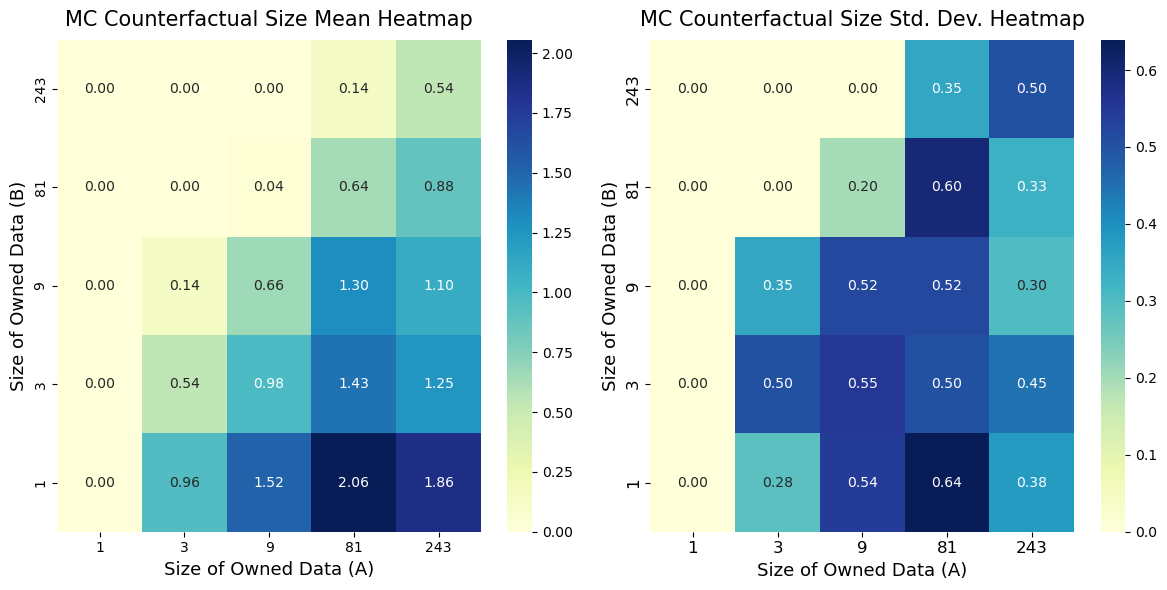

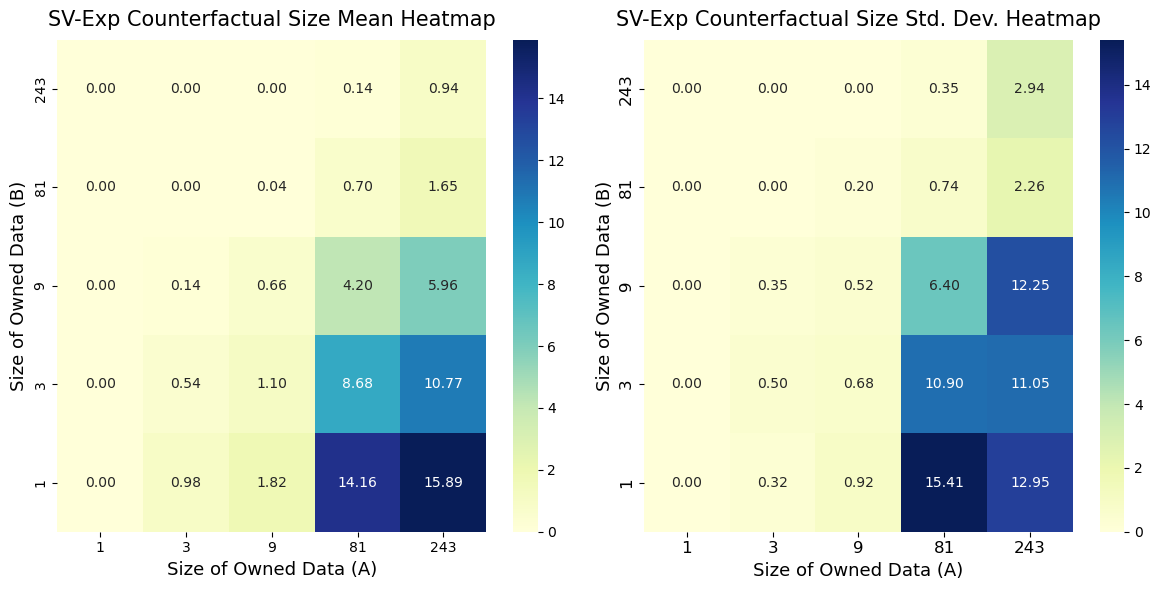

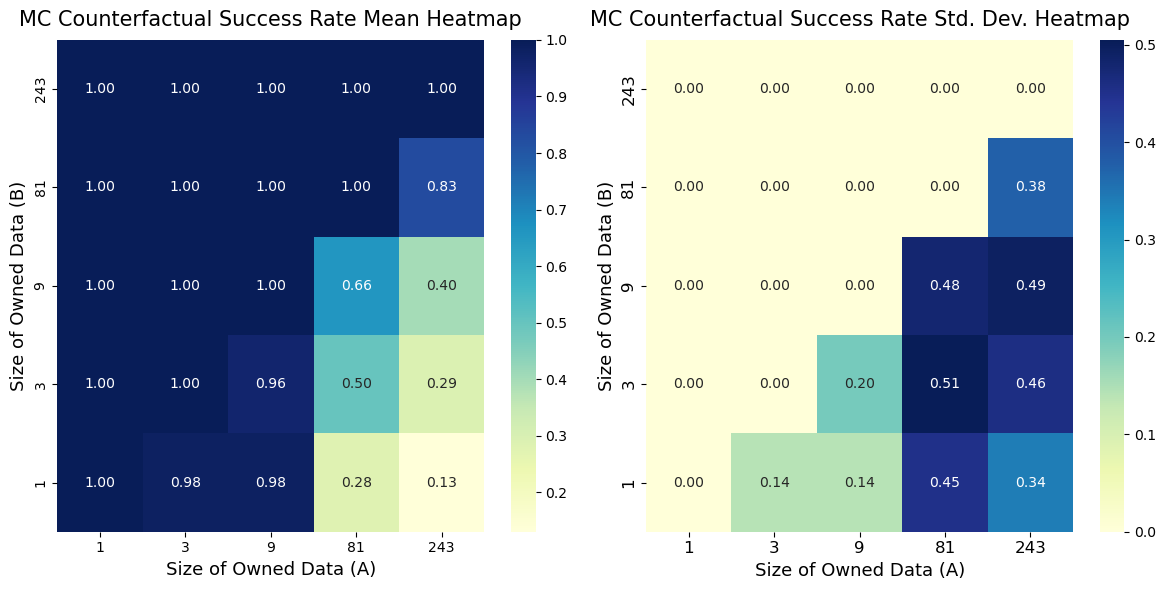

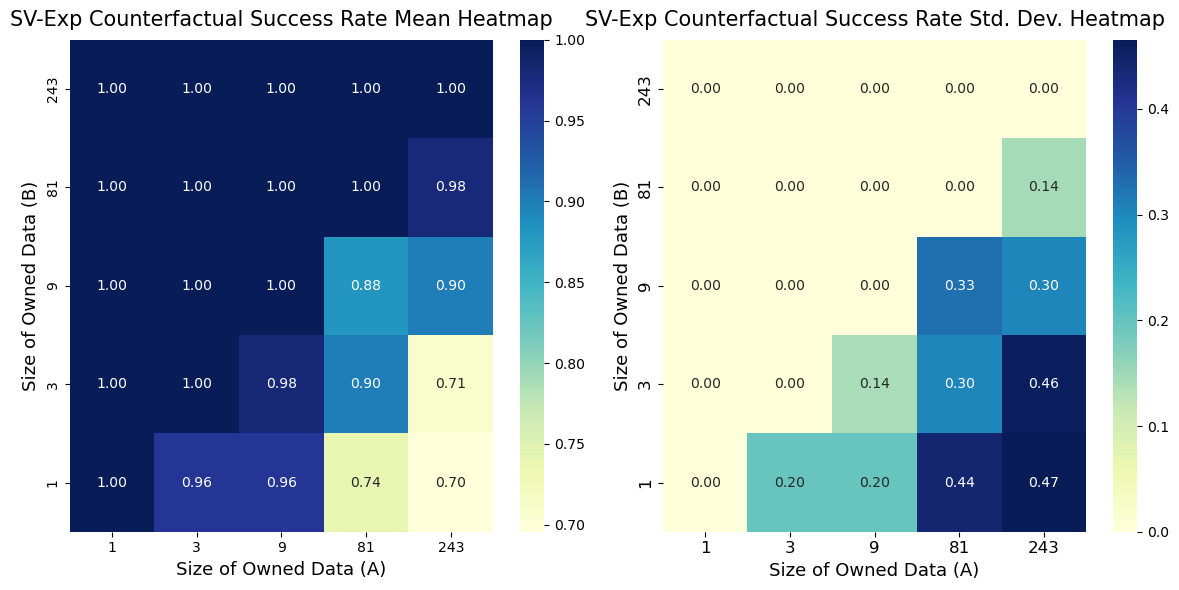

In [5]:
df_zipf = pd.read_csv('FIXED_ZIPFIAN_LR.csv')  # Replace 'your_data.csv' with the actual file path


# df.columns = ["A_index","B_index","A_size","B_size","total_MC_samples","total_greedy_samples","MC_answer","greedy_answer","MC_time","greedy_time", "MC_accuracy", "greedy_accuracy", "MC_final_difference", "greedy_final_difference", "num_owners", "data_dist", "size_dist", "util", "ds_name", "trial"]
df_zipf.columns = ["ds_size","A_size","B_size","total_MC_samples","total_greedy_samples","MC_answer","greedy_answer","MC_time","greedy_time", "MC_accuracy", "greedy_accuracy", "MC_final_difference", "greedy_final_difference", "num_owners", "data_dist", "size_dist", "util", "ds_name"]
df_zipf.loc[df_zipf['MC_final_difference'] == 1, 'MC_answer'] = np.nan
df_zipf.loc[df_zipf['MC_final_difference'] == 1, 'MC_time'] = np.nan
df_zipf.loc[df_zipf['greedy_final_difference'] == 1, 'greedy_answer'] = np.nan
df_zipf.loc[df_zipf['greedy_final_difference'] == 1, 'greedy_time'] = np.nan

makeTableZipf(df_zipf, "A_size", "B_size", ["MC_answer", "greedy_answer", "MC_accuracy", "greedy_accuracy"])

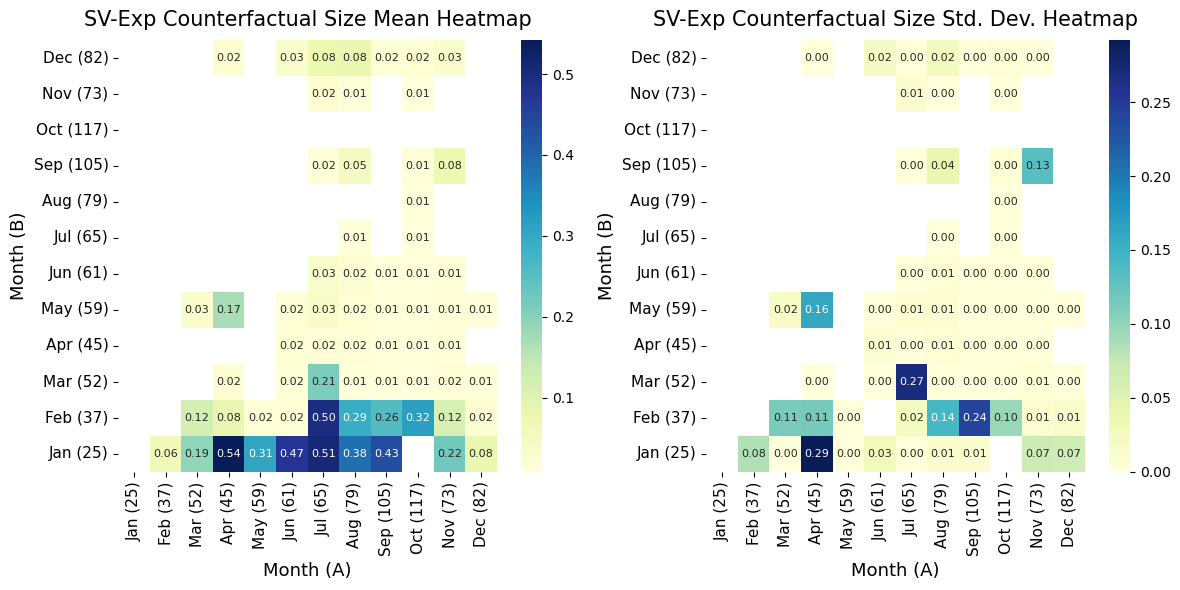

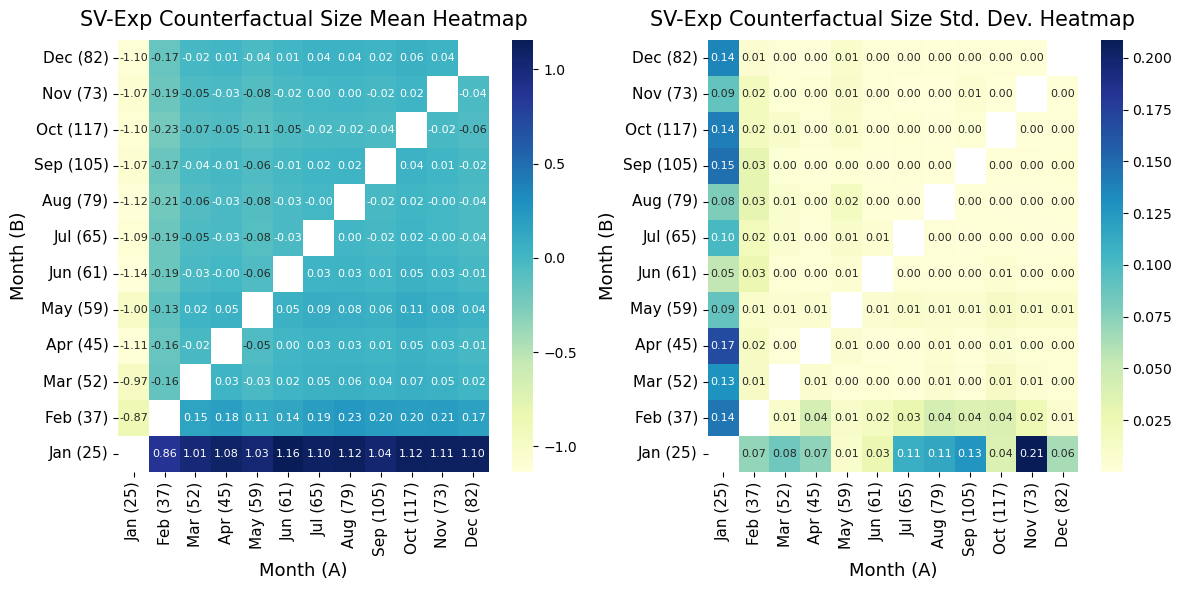

In [6]:
df_nat = pd.read_csv('NATURAL_FIXED_ORIG.csv')  # Replace 'your_data.csv' with the actual file path


df_nat.columns = ["A_index","B_index","A_size","B_size","total_MC_samples","total_greedy_samples","BF", "MC_answer", "MC_CF", "greedy_answer", "greedy_CF", "MC_time","greedy_time", "MC_accuracy", "greedy_accuracy", "MC_final_difference", "greedy_final_difference", "MC_orig_difference", "greedy_orig_difference", "owners", "data_dist", "size_dist", "util", "ds_name"]

df_nat.loc[df_nat['MC_final_difference'] == 1, 'MC_answer'] = np.nan
df_nat.loc[df_nat['MC_final_difference'] == 1, 'MC_time'] = np.nan
df_nat.loc[df_nat['greedy_final_difference'] == 1, 'greedy_answer'] = np.nan
df_nat.loc[df_nat['greedy_final_difference'] == 1, 'greedy_time'] = np.nan
df_nat.loc[df_nat['MC_final_difference'] == 1, 'MC_accuracy'] = np.nan
df_nat.loc[df_nat['greedy_final_difference'] == 1, 'greedy_accuracy'] = np.nan
df_nat.loc[df_nat['MC_answer'] == 0, 'MC_answer'] = np.nan
df_nat.loc[df_nat['MC_time'] == 0, 'MC_time'] = np.nan
df_nat.loc[df_nat['greedy_answer'] == 0, 'greedy_answer'] = np.nan
df_nat.loc[df_nat['greedy_time'] == 0, 'greedy_time'] = np.nan
df_nat['greedy_answer'] = df_nat['greedy_answer']/df_nat['A_size']
df_nat['MC_answer'] = df_nat['MC_answer']/df_nat['A_size']

makeTableNat(df_nat, "A_index", "B_index", ["greedy_answer"])

makeTableNat(df_nat, "A_index", "B_index", ["greedy_orig_difference"])


In [7]:
# X_train_res = pd.read_csv("reservation_train.csv")
# owners, categories = assignClusters(X_train_res, "arrival_month")
# genWassDist(X_train_res, "arrival_month")

In [8]:
smallcase_kde = pd.read_csv("SMALLCASE_KDE.csv")
smallcase_lr = pd.read_csv("SMALLCASE_LR.csv")

smallcase_kde.columns = ["ds_size","A_size","B_size","total_MC_samples","total_greedy_samples","BF_answer", "BF_CF", "MC_answer","MC_CF", "greedy_answer", "greedy_CF", "MC_time","greedy_time", "MC_accuracy", "greedy_accuracy", "MC_final_difference", "greedy_final_difference", "MC_orig_difference", "greedy_orig_difference","num_owners", "data_dist", "size_dist", "util", "ds_name"]
smallcase_lr.columns = ["ds_size","A_size","B_size","total_MC_samples","total_greedy_samples","BF_answer", "BF_CF", "MC_answer","MC_CF", "greedy_answer", "greedy_CF", "MC_time","greedy_time", "MC_accuracy", "greedy_accuracy", "MC_final_difference", "greedy_final_difference", "MC_orig_difference", "greedy_orig_difference","num_owners", "data_dist", "size_dist", "util", "ds_name"]

mean_BF_answer = smallcase_kde['BF_answer'].mean()
mean_MC_answer = smallcase_kde['MC_answer'].mean()
mean_greedy_answer = smallcase_kde['greedy_answer'].mean()


mean_BF_answer_lr = smallcase_lr['BF_answer'].mean()
mean_MC_answer_lr = smallcase_lr['MC_answer'].mean()
mean_greedy_answer_lr = smallcase_lr['greedy_answer'].mean()

std_BF_answer = smallcase_kde['BF_answer'].std()
std_MC_answer = smallcase_kde['MC_answer'].std()
std_greedy_answer = smallcase_kde['greedy_answer'].std()

std_BF_answer_lr = smallcase_lr['BF_answer'].std()
std_MC_answer_lr = smallcase_lr['MC_answer'].std()
std_greedy_answer_lr = smallcase_lr['greedy_answer'].std()

print(mean_BF_answer, mean_MC_answer, mean_greedy_answer, mean_BF_answer_lr, mean_MC_answer_lr, mean_greedy_answer_lr)

print(std_BF_answer, std_MC_answer, std_greedy_answer, std_BF_answer_lr, std_MC_answer_lr, std_greedy_answer_lr)

def jaccard_index(list1, list2):
        set1 = set(list1)
        set2 = set(list2)
        intersection = set1.intersection(set2)
        union = set1.union(set2)
        return len(intersection) / len(union)

smallcase_kde['jaccard_index_MC'] = smallcase_kde.apply(lambda row: jaccard_index(row['BF_CF'], row['MC_CF']), axis=1)
smallcase_lr['jaccard_index_MC'] = smallcase_lr.apply(lambda row: jaccard_index(row['BF_CF'], row['MC_CF']), axis=1)
smallcase_kde['jaccard_index_greedy'] = smallcase_kde.apply(lambda row: jaccard_index(row['BF_CF'], row['greedy_CF']), axis=1)
smallcase_lr['jaccard_index_greedy'] = smallcase_lr.apply(lambda row: jaccard_index(row['BF_CF'], row['greedy_CF']), axis=1)


mean_jaccard_MC_kde = smallcase_kde['jaccard_index_MC'].mean()
mean_jaccard_MC_lr = smallcase_lr['jaccard_index_MC'].mean()
mean_jaccard_greedy_kde = smallcase_kde['jaccard_index_greedy'].mean()
mean_jaccard_greedy_lr = smallcase_lr['jaccard_index_greedy'].mean()

print(mean_jaccard_MC_kde, mean_jaccard_MC_lr, mean_jaccard_greedy_kde, mean_jaccard_greedy_lr)

std_jaccard_MC_kde = smallcase_kde['jaccard_index_MC'].std()
std_jaccard_MC_lr = smallcase_lr['jaccard_index_MC'].std()
std_jaccard_greedy_kde = smallcase_kde['jaccard_index_greedy'].std()
std_jaccard_greedy_lr = smallcase_lr['jaccard_index_greedy'].std()

print(std_jaccard_MC_kde, std_jaccard_MC_lr, std_jaccard_greedy_kde, std_jaccard_greedy_lr)


2.0526315789473686 1.868421052631579 3.1578947368421053 2.210526315789474 2.1578947368421053 2.3947368421052633
1.3744260408179558 1.0441873248007454 3.0181998911958754 0.9907107668805697 0.9733285267845753 1.4984581929113912
0.9329156223893066 0.9702485380116957 0.2854491268964953 0.37848679098679106
0.14415921822278252 0.08352058015912688 0.18856569589699185 0.18043231380974448
